# Customer Churn Prediction for Banks usinf Logistic Regression

In [1]:
import numpy as np
import pandas as pd
#for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Checking duplicate and missing values
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
#Let's get the summary statistics for the numeric variables 
#We will omit Row Number and Customer Id as they are identification numbers and
#will omit Exited, HasCrCard and IsActiveMember as they are just categories

#These are more relevant and can give us an idea on our data in terms of mean and std
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# The summary statistics for the selected columns are;
df[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

Firstly, to be effective as possible, we only want to work with relevant data and weed out what is not going to be useful to us. The following columns will be definetly dropped; 'Row Number' as it is just a number, 'CustomerId' as it is just a serial number that will not really help us in knowing if a customer is going to churn or not and lastly 'Surname' because I do not see how your name will influence the decision you going to take in this context. It just leads to unnecessary profiling if we include it in our data

In [10]:
# Dropping the columns
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [11]:
#Let's recheck our data
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#What is the retention rate of our bank? 
# The best way to see the ratio between churned and not churned is a pie chart
#Let's count the number of unique values in the Exited column
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Proportion of Customers who Exited')

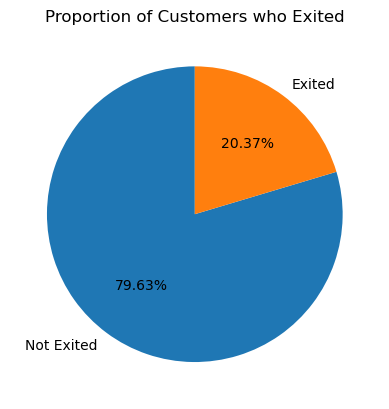

In [13]:
#We can already visualize what the percentages are going to be. 
#Let's create our diagram

ratios = df['Exited'].value_counts()
plt.pie(ratios,labels=['Not Exited','Exited'], autopct = '%0.2f%%', 
        startangle=90)

plt.title('Proportion of Customers who Exited')

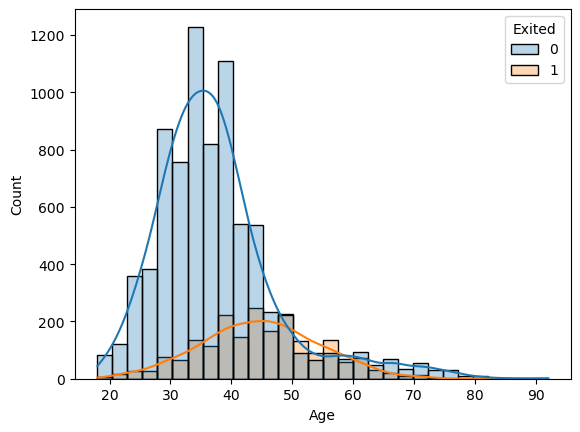

In [14]:
#Histplot allows us to see the distribution of our data
# Our KDE curves shows the distribution and alpha is our transparency parameter
sns.histplot(x = 'Age', data = df, hue='Exited',bins=30,kde=True,alpha=0.3)
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

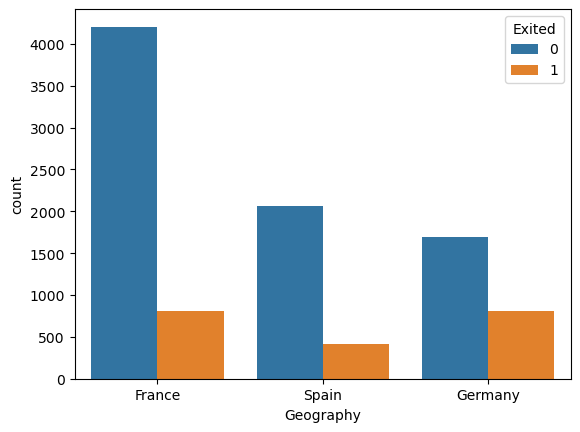

In [15]:
sns.countplot(x='Geography', hue='Exited', data=df)

<Axes: xlabel='Geography', ylabel='count'>

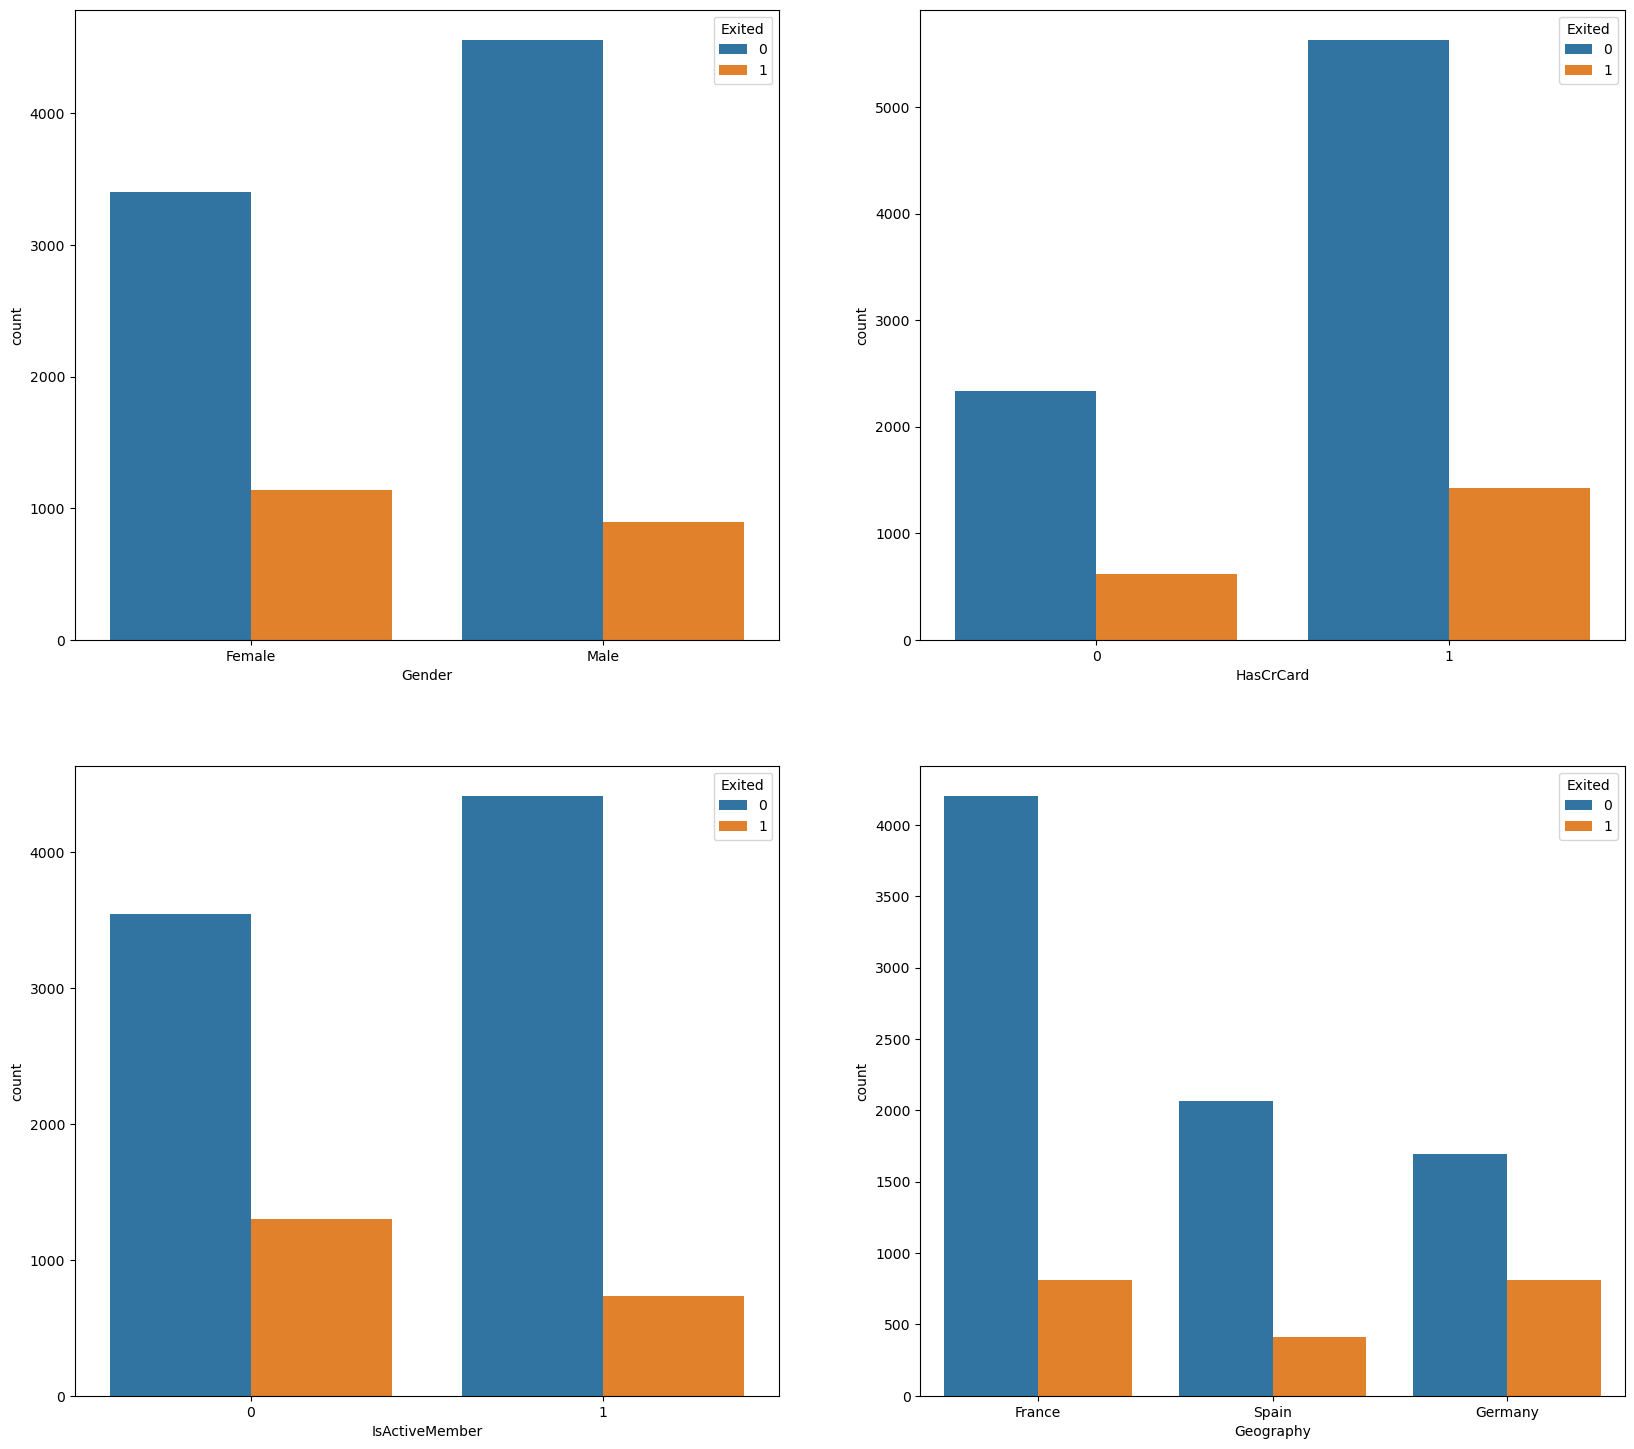

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 18))
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

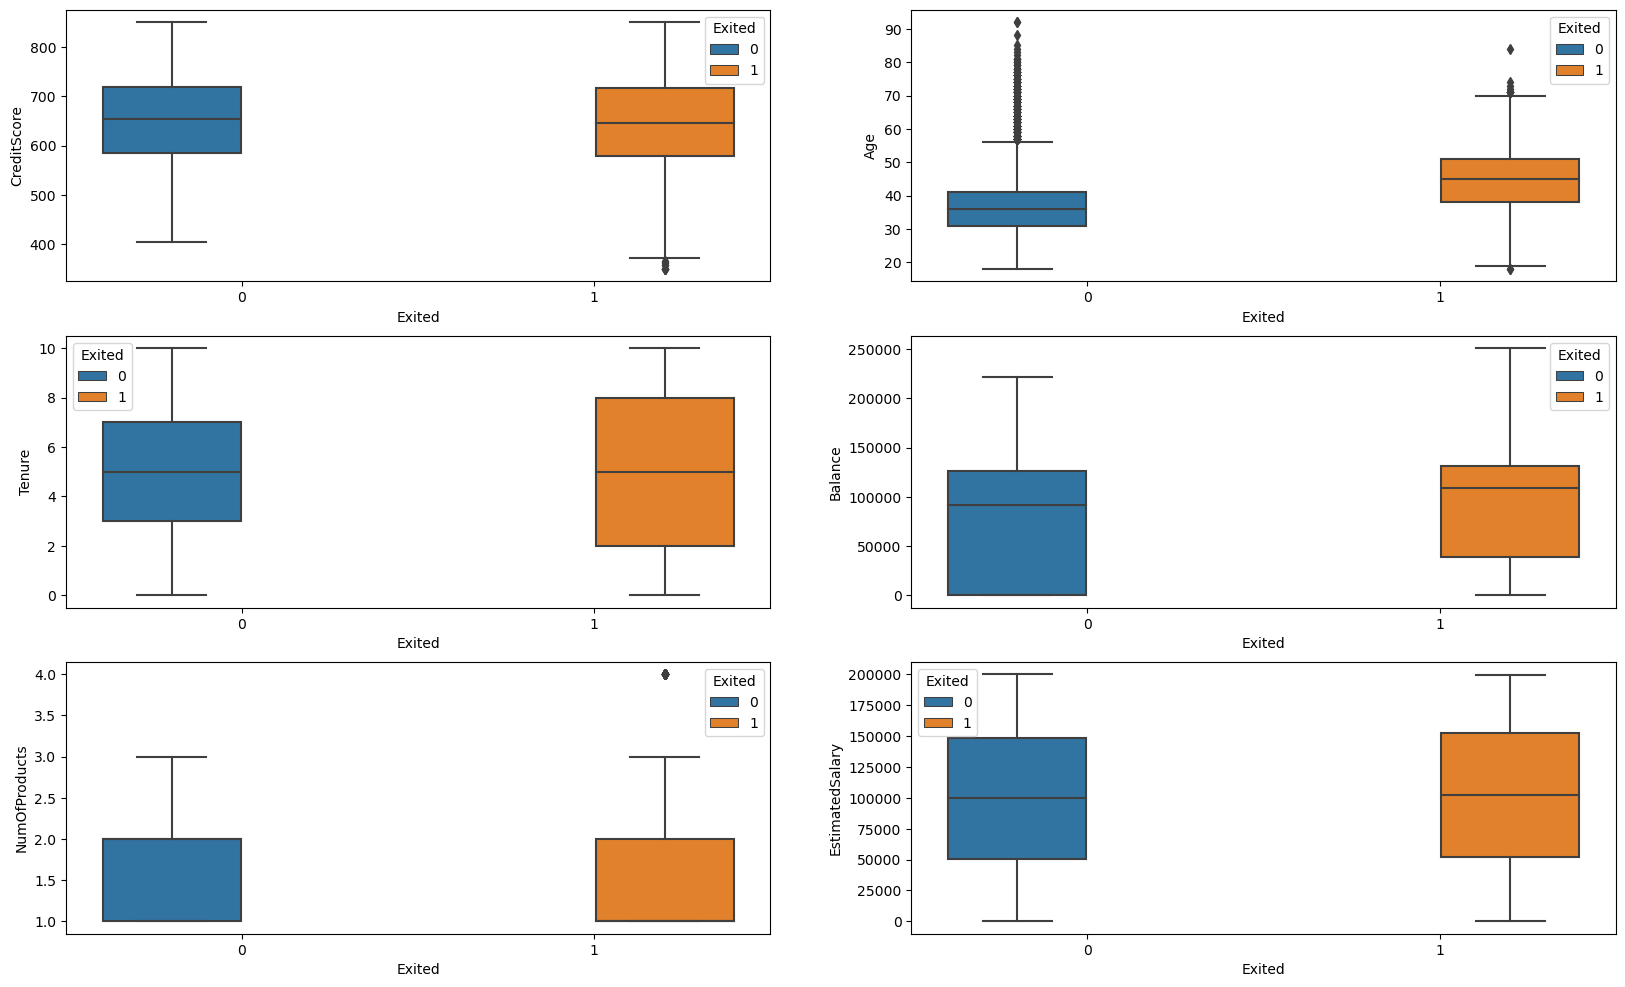

In [17]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [18]:
corr = df.corr(numeric_only=True)

<Axes: >

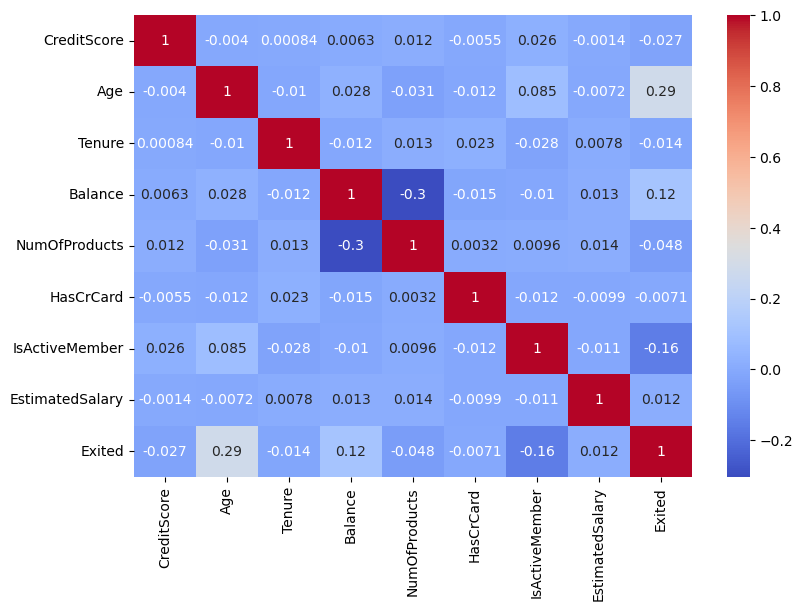

In [19]:
fig, ax = plt.subplots(figsize=(9,6))

sns.heatmap(corr,annot=True,cmap='coolwarm')

# Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [21]:
#Let's convert categorical variables to numerical values
from sklearn.preprocessing import LabelEncoder

#Application of the LabelEncoder
le = LabelEncoder()

# encode Country column
df['Geography'] = le.fit_transform(df['Geography'])

# encode Gender column
df['Gender'] = le.fit_transform(df['Gender'])

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Let's define our X and y
# We will drop 'Exited' from our X because it is our target variable

X= df.drop(['Exited'],axis=1)
y= df['Exited']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
logmodel = LogisticRegression(random_state=42)
logmodel.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
y_pred = logmodel.predict(X_test)


In [27]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8005


In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

[[1573   34]
 [ 365   28]]
